In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as stat

g=9.81

##Scheibe
ms=1.33 ##Masse 
dds=0.245 ##Durchmesser
rs=dds/2
ds=0.028 ##Höhe/Dicke 
ls=0.126 ##Abstand Scheibe-Fixierung (Fehlerbehaftet)
sigma_ls=0.003


##Pendelgewicht
mp=0.1 ##Masse 
rp=0.1405 ##Abstand Drehachse-Pendelgewicht (Fehlerbehaftet)
sigma_rp=0.002

##Ausgleichsgewicht
ma=0.936 #Masse
dda=0.06 #Durchmesser fehlerbehaftet
ra=dda/2
sigma_ra=0.0005
da=0.043 #Höhe/Dicke fehlerbehaftet
sigma_da=0.0005
la=0.17 #Abstand zu Fixierung fehlerbehaftet
sigma_la=0.003

##Zusatzgewicht
azg=0.27 #Abstand zu Fixierung fehlerbehaftet
sigma_azg=0.003

##Stab
mstab=1 #Masse fehlerbehaftet
lstab=1 #fehlerbehaftet

#Trägheitsmomente theoretisch
Ih=0.5*ms*(rs)**2
Iv=(1/12)*ms*((rs)**2+3*(ds**2))+ls**2*ms+(1/12)*ma*((ra)**2+3*(da**2))+la**2*ma

#partielle Ableitungen
Ivls=2*ls*ms
Ivla=2*la*ma
Ivra=(1/6)*ma*ra
Ivda=0.5*ma*da

##Fehlerfortpflanzung von Iv
sigma_Iv=(sigma_ls**2*Ivls**2+sigma_la**2*Ivla**2+sigma_ra**2*Ivra**2+sigma_da**2*Ivda**2)**0.5

##Fehler von T
T=np.array([19.99,20.15,20.56,19.82,20.13,19.88])*0.1
T_=np.mean(T)

Tdev=stat.stdev(T)/math.sqrt(6)
sigmat_sys=0.06
sigma_t=(sigmat_sys**2+Tdev**2)**0.5

##Trägheitsmomente empirisch

T_neu=2.01
sigma_Tneu=0.07

Ihemp=(mp*g*rp*T_neu**2)/(4*np.pi**2)-rp**2*mp

##partielle Ableitungen 
Iht=rp*T_neu*mp*g/(2*np.pi**2)
Ihrp=rp-2*rp*mp

sigma_Ihemp=(sigma_Tneu**2*Iht**2+sigma_rp**2*Ihrp**2)**0.5
print(Ihemp,sigma_Ihemp)

print(T_,sigma_t)

0.012131125024770439 0.0010078390865735536
2.008833333333333 0.06097289926224966


[0.00036782 0.00110957 0.00363313 0.00588508]


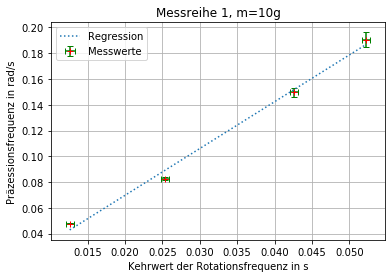

LinregressResult(slope=3.6322568969674927, intercept=-0.0029398735571292273, rvalue=0.9968199239891798, pvalue=0.003180076010820154, stderr=0.20532084852565724)

In [17]:
from scipy import stats
import scipy.stats
##Präzessionsfrequenzen
##10g
Tp=np.array([66,38,21,16.5])*2
sigmasystp=1.02
sigma_wp=sigmasystp*2*np.pi/(Tp**2)
print(sigma_wp)
Tr=np.array([0.140,0.335,0.619,0.985])/3
sigmasystr=0.00033333
Tr1_=[np.mean([Tr[i],Tr[i+1]]) for i in range (3)]

Tr_=np.array([0.07916666666666668, 0.159, 0.2673333333333333, 0.328333333])
w_p1=2*np.pi/Tp ##Präzessionsfrequenz
w_rr1=Tr_/(2*np.pi) #Kehrwert von wr


slope=3.6322568969674927 #Steigung
intercept=-0.0029398735571292273 #Achsenabschnitt
plt.figure()
plt.grid()
plt.errorbar(w_rr1[0], w_p1[0], yerr=sigma_wp[0],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3, label='Messwerte')
plt.errorbar(w_rr1[1], w_p1[1], yerr=sigma_wp[1],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3)
plt.errorbar(w_rr1[2], w_p1[2], yerr=sigma_wp[2],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3)
plt.errorbar(w_rr1[3], w_p1[3], yerr=sigma_wp[3],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3)
plt.plot(w_rr1,slope*w_rr1+intercept,':',label="Regression")
plt.title("Messreihe 1, m=10g")
plt.xlabel("Kehrwert der Rotationsfrequenz in s")
plt.ylabel("Präzessionsfrequenz in rad/s")

plt.legend(loc="upper left")

plt.savefig('Praezessionsfrequenz1.png')
plt.show()


scipy.stats.linregress(w_rr1,w_p1)

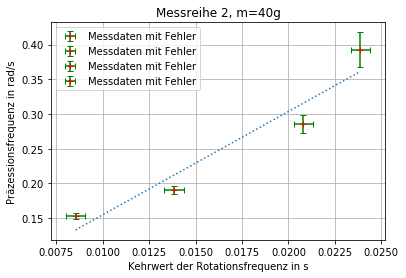

LinregressResult(slope=14.885196314995564, intercept=0.005946397730999753, rvalue=0.9591442916159741, pvalue=0.04085570838402587, stderr=3.104668294294782)

In [18]:
Tr2_=np.array([0.05366666,0.087,0.130666666,0.15])
Tp2=np.array([41,33,22,16])
w_p2=2*np.pi/Tp2
w_rr2=Tr2_/(2*np.pi)##Kehrwert von w_r
sigma_wp2=sigmasystp*2*np.pi/(Tp2**2)

slope2=14.885196314995564
intercept2=0.005946397730999753

plt.figure()
plt.grid()
plt.errorbar(w_rr2[0], w_p2[0], yerr=sigma_wp2[0],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.errorbar(w_rr2[1], w_p2[1], yerr=sigma_wp2[1],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.errorbar(w_rr2[2], w_p2[2], yerr=sigma_wp2[2],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.errorbar(w_rr2[3], w_p2[3], yerr=sigma_wp2[3],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.plot(w_rr2,slope2*w_rr2+intercept2,':')
plt.title("Messreihe 2, m=40g")
plt.xlabel("Kehrwert der Rotationsfrequenz in s")
plt.ylabel("Präzessionsfrequenz in rad/s")
plt.savefig('Praezessionsfrequenz2.png')
plt.legend(loc="upper left")
plt.show()

scipy.stats.linregress(w_rr2,w_p2)

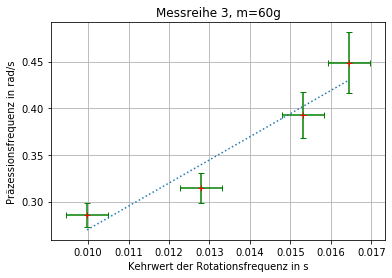

LinregressResult(slope=24.80358809238444, intercept=0.022299804755857466, rvalue=0.9593309995875204, pvalue=0.04066900041247955, stderr=5.160795952113185)

In [19]:
Tr3_=np.array([0.0626666,0.0803333333,0.0961666666,0.103333333])
Tp3=np.array([22,20,16,14])
w_p3=2*np.pi/Tp3
w_rr3=Tr3_/(2*np.pi)##Kehrwert von w_r
sigma_wp3=sigmasystp*2*np.pi/(Tp3**2)

slope3=24.80358809238444 
intercept3=0.022299804755857466

plt.figure()
plt.grid()
plt.errorbar(w_rr3[0], w_p3[0], yerr=sigma_wp3[0],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.errorbar(w_rr3[1], w_p3[1], yerr=sigma_wp3[1],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.errorbar(w_rr3[2], w_p3[2], yerr=sigma_wp3[2],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.errorbar(w_rr3[3], w_p3[3], yerr=sigma_wp3[3],xerr=sigmasystr/2*np.pi, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')

plt.plot(w_rr3,slope3*w_rr3+intercept3,':')
plt.title("Messreihe 3, m=60g")
plt.xlabel( "Kehrwert der Rotationsfrequenz in s")
plt.ylabel("Präzessionsfrequenz in rad/s")
plt.savefig('Praezessionsfrequenz3.png')
plt.show()

scipy.stats.linregress(w_rr3,w_p3)

In [20]:
##Berechnung Trägheitsmomente
r=0.27
m1=0.01
m2=0.04
m3=0.06
I1=m1*g*r/(slope)
I2=m2*g*r/(slope2)
I3=m3*g*r/(slope3)
print(I1,I2,I3)

0.00811354475377587 0.010460536820632662 0.04873007346118151


LinregressResult(slope=0.08020713976336007, intercept=1.5438843105853017, rvalue=0.9783588925579798, pvalue=0.02164110744202019, stderr=0.011994775256695421)

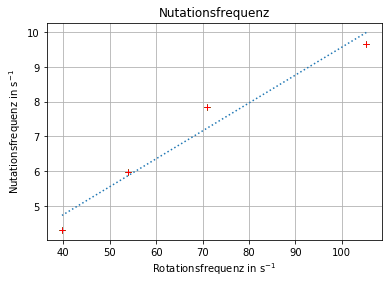

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as stat
from scipy import stats
import scipy.stats

#Nutation
wr=2*np.pi/(np.array([0.179,0.266,0.35,0.475])/3)
wn=2*np.pi/(np.array([6.5,8,10.5,14.6])/10)
plt.figure()

plt.plot(wr,0.08020713976336007*wr+1.5438843105853017,':')
plt.title("Nutationsfrequenz")
plt.xlabel( "Rotationsfrequenz in s$^{-1}$")
plt.ylabel("Nutationsfrequenz in s$^{-1}$")
plt.savefig('Nut.png')
plt.errorbar(wr[0],wn[0], yerr=0, xerr=0, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.errorbar(wr[1],wn[1], yerr=0, xerr=0, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.errorbar(wr[2],wn[2], yerr=0, xerr=0, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.errorbar(wr[3],wn[3], yerr=0, xerr=0, fmt='+', ecolor='g', color='r', capsize=3, label='Messdaten mit Fehler')
plt.grid()

scipy.stats.linregress(wr,wn)